# Continuous System

## Imports, stuff

In [25]:
from sympy import *
init_printing(use_latex=True)
from IPython.display import Latex
%matplotlib inline

## Symbols

In [38]:
x, w2 = symbols('x omega^2')
L, m, EJ = symbols('L m EJ', positive = True)
A, B, C, D, ld, LD = symbols('A B C D lambda Lambda')
f, φ = symbols('f phi')

## Supported mass and stiffness of support

In [39]:
mass_coeff = 8
stiff_coeff = 24
k = stiff_coeff*EJ/L**3
M = mass_coeff*m*L

## General solution and its derivatives

In [40]:
f0 = A*cos(ld*x) + B*sin(ld*x) + C*cosh(ld*x) + D*sinh(ld*x)
f1 = f0.diff(x)
f2 = f1.diff(x)
f3 = f2.diff(x)
display(Eq(φ,f0))

### Left boundary conditions
The eigenfunction and its second derivative must be zero when `0` is substituted for `x`, we solve for `A` and `C` and put the solution in the variable `AC`.
We substitute our solution in the eigenfunctions and all of its derivatives.

In [41]:
AC = solve((f0.subs(x,0), f2.subs(x,0)), A, C, dict=True)
f0, f1, f2, f3 = [f.subs(AC[0]) for f in (f0, f1, f2, f3)]
display(Eq(φ, f0))

### First, simpler boundary condition at the right end, $x=L$.
The second derivative must be equal to zero,  so we solve and  substitute, also substitute $\lambda L$ with $\Lambda$

<IPython.core.display.Latex object>

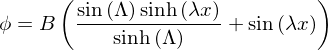

In [42]:
D = solve(f2.subs(x, L), D, dict=True)
f0, f1, f2, f3 = [f.subs(D[0]).subs(L,LD/ld) for f in (f0, f1, f2, f3)]
display(Latex('With $\\Lambda = \\lambda\\,L$ it is'))
display(Eq(φ, f0.simplify()))

### Last boundary conditions, equation of wave numbers
The last equation is an equation of equilibrium
$$V(t) + k\, v(t) + M\,\ddot v(t) = 0$$
(all the forces are directed upwards).

With $v(t)=\phi(x)\,\sin\omega t$, the shear is $V = -EJ\, v''' = -EJ\, \phi'''(x)\sin\omega t$ and
the inertial force is $M\,\ddot v= -M\,\phi\,\omega^2\sin\omega t$ that can be rewritten taking into account that $\omega^2=\lambda^4EJ/m$: $\text{ }M\,\ddot v= - M/m\,EJ\,\lambda^4\phi\sin\omega t$.

Let's write the expanded equation, collecting all the terms that are no $\Lambda$:

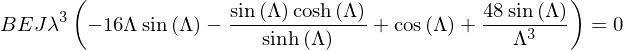

In [43]:
eq = (f0*k - f0*M*ld**4*EJ/m - EJ*f3).subs(x, L).subs(L, LD/ld)
display(Eq(eq.expand().collect(B).collect(ld).collect(EJ), 0))

We have a non trivial solution when the term in brackets is equal to zero, to have the bracketed term we must divide both members by $B\,EJ\, \lambda^3$

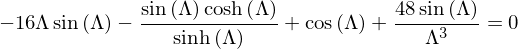

In [44]:
eq = (eq/EJ/ld**3/B).expand()
display(Eq(eq,0))

The behavior near $\Lambda=0$ is led by the last term that goes like $48/\Lambda^2$, so to have a nice plot we multiply everything by $\Lambda^2$

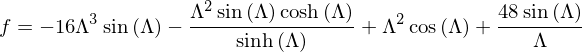

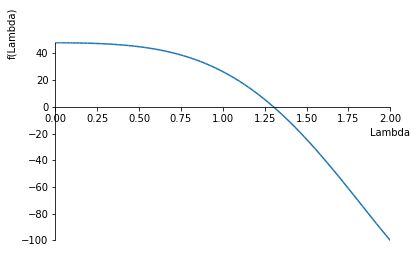

In [45]:
display(Eq(symbols('f'), (eq*LD**2).expand()))
plot(eq*LD**2, (LD, 0, 2));

and see that there is a root between 1.25 and 1.5.  If we were interested in upper roots, we can observe that all the terms in the LHS of our determinantal equations are bounded for increasing $\Lambda$ except for the first one, that grows linearly, so to investigate the other roots we may divide the equation by $\Lambda$ to remove that trend...

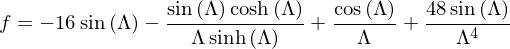

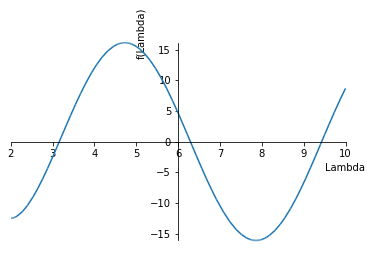

In [46]:
display(Eq(symbols('f'), (eq/LD).expand()))
plot(eq/LD, (LD, 2, 10));

All the RHS terms except the first have $\Lambda$ in the denominator and are bounded, so the asymptotic behaviour is controlled by $\Lambda_{n+1}=n\pi$.

In [19]:
from scipy.optimize import bisect
f = lambdify(LD, eq, modules='math')
l1 = bisect(f, 0.5, 1.5)
Latex(r'$\lambda_1=%.6f\,\frac{1}{L}, \quad\omega_1^2=%.6f\,\frac{EJ}{mL^4}$'%(l1, l1**4))

<IPython.core.display.Latex object>

## Rayleigh Quotient

Using $v=\frac xL\sin\omega t$ (that is, a rigid rotation about the left hinge) we have
$$T_\text{max}=\frac12\omega^2\Big(\int_0^Lm\left(\frac xL\right)^2dx + M\,1^2\Big) =
\frac12\omega^2\Big(\frac13+8\Big)mL
$$
and
$$V_\text{max}=\frac12\Big(\int_0^L EJ\left(\frac xL\right)''^2 + k\,1^2\Big) =
\frac12\Big(0+24\Big)\,\frac{EJ}{L^3}.
$$

Equating the maximum energies and solving for $\omega^2$ gives
$$ \omega^2 = \frac{24\,EJ/L^3}{\frac{25}3\,mL} = 3\,\frac{24}{25}\,\frac{EJ}{mL^4}=\ldots
$$

In [23]:
display(Latex(r'$\omega^2_{R00} = %.3f\,\frac{EJ}{mL^4}$'%(3*24/25)))

<IPython.core.display.Latex object>

We can say that the RQ check reinforces our previouos finding...